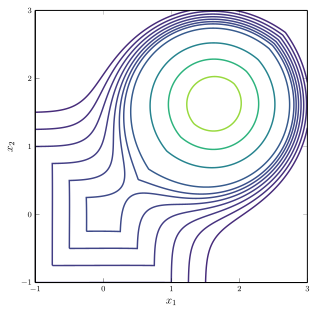

In [26]:
using Plots, LaTeXStrings, Printf, LinearAlgebra, Dates
pgfplotsx() #pyplot()

fx(x1,x2) =  abs(x1+x2) + abs(x2 - x1) - 7exp(-(x1-1.5)^2 - (x2-1.5)^2)*(x1+x2)

x1 = -1:0.01:3
x2 = -1:0.01:3

pl1 = contour(x1, x2, fx, framestyle = :box, levels=[-15,-10,-5,-1,0,0.5,1,1.5,2,2.5,3], 
    c = cgrad(:viridis, rev = true), ylab = L"x_2", xlab = L"x_1",
    xlims = (-1,3), ylims = (-1,3), legend = false, grid = false,
    contour_labels = false, bins = 150, label = false, size=(450,450), lw= 1.5)

In [27]:
function bracket_minimum(f, x=0; s=1e-2, k=2.0)
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    end

    while true
        c, yc = b + s, f(b + s)
        if yc > yb
            return a < c ? (a, c) : (c, a)
        end
        a, ya, b, yb = b, yb, c, yc
        s *= k
    end
end

using Base.MathConstants
function fibonacci_search(f, a, b, n; ϵ=0.002)
    s = (1-√5)/(1+√5)
    ρ = 1 / (φ*(1-s^(n+1))/(1-s^n))
    d = ρ*b + (1-ρ)*a
    yd = f(d)
    for i in 1 : n-1
        if i == n-1
            c = ϵ*a + (1-ϵ)*d
        else
            c = ρ*a + (1-ρ)*b
        end
        yc = f(c)
        if yc < yd
            b, d, yd = d, c, yc
        else
            a, b = b, c
        end
        ρ = 1 / (φ*(1-s^(n-i+1))/(1-s^(n-i)))
    end
    return a < b ? (a, b) : (b, a)
end

function line_search(f, x, d)
    objective = α -> f(x + α*d)
    a, b = bracket_minimum(objective)
    α = fibonacci_search(objective, a, b, 100)
    return x + (sum(α)/2)*d, sum(α)/2
end

line_search (generic function with 1 method)

In [28]:
basis(i, n) = [k == i ? 1.0 : 0.0 for k in 1 : n]

basis (generic function with 1 method)

In [29]:
function cyclic_coordinate_descent(f, x, ϵ; maxiter=100)
    Δ, n = Inf, length(x)
    
    while abs(Δ) > ϵ
        x′ = copy(x)
        for i in 1 : n
            d = basis(i, n)
            x, α = line_search(f, x, d)
            push!(points, (x))
        end
        Δ = norm(x - x′)
        
        if length(points) > maxiter
            break
        end
    end
    return x
end

cyclic_coordinate_descent (generic function with 1 method)

In [30]:
f = x -> abs(x[1]+x[2]) + abs(x[2] - x[1]) - 7exp(-(x[1]-1.5)^2 - (x[2]-1.5)^2)*(x[1]+x[2])
x0 = [0, -0]

points = []
push!(points, (x0))

x_opt = cyclic_coordinate_descent(f, x0, 0.000001)

2-element Array{Float64,1}:
 1.176056953577487e-23
 1.176056953577487e-23

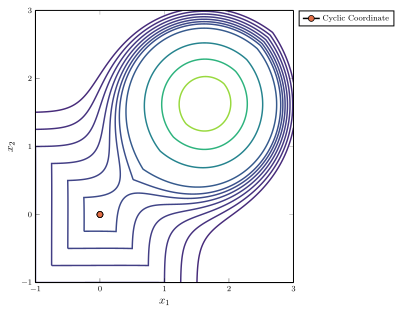

In [31]:
plot!([P[1] for P in points], [P[2] for P in points], label = "Cyclic Coordinate", legend = true, lw = 1.5, lc = :black, markershape = :circle)

display(pl1)
savefig(pl1, "7.1b Cyclic Coordinate.svg")